# Importing Libraries

In [1]:
!pip install matplotlib
!pip install tensorflow
!pip install pandas
!pip install seaborn

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
#     pad_to_aspect_ratio=False,
#     data_format=None,
#     verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
#     pad_to_aspect_ratio=False,
#     data_format=None,
#     verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x)
    print(y)
    break

tf.Tensor(
[[[[ 79.75  68.25  76.25]
   [146.25 131.   137.75]
   [147.   128.75 132.  ]
   ...
   [174.5  162.5  162.5 ]
   [172.   160.   160.  ]
   [176.   164.   164.  ]]

  [[ 72.25  60.75  66.25]
   [136.   121.25 124.  ]
   [150.75 134.5  134.  ]
   ...
   [174.5  162.5  162.5 ]
   [160.   148.   148.  ]
   [179.5  167.5  167.5 ]]

  [[ 76.25  67.    67.25]
   [152.75 140.75 139.  ]
   [138.   123.75 116.  ]
   ...
   [183.5  171.5  171.5 ]
   [175.   163.   163.  ]
   [167.   155.   155.  ]]

  ...

  [[ 70.5   60.5   63.5 ]
   [140.75 129.75 133.75]
   [152.   141.   145.  ]
   ...
   [163.75 152.75 156.75]
   [170.5  159.5  163.5 ]
   [166.   155.   159.  ]]

  [[ 81.75  71.75  74.75]
   [140.25 129.25 133.25]
   [147.   136.   140.  ]
   ...
   [158.25 147.25 151.25]
   [174.   163.   167.  ]
   [172.75 161.75 165.75]]

  [[ 74.    64.    67.  ]
   [140.   129.   133.  ]
   [142.25 131.25 135.25]
   ...
   [170.75 159.75 163.75]
   [163.   152.   156.  ]
   [163.5  152.5  15

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[225.5  211.5  210.5 ]
   [225.75 211.75 210.75]
   [226.   212.   211.  ]
   ...
   [228.25 214.25 213.25]
   [225.25 211.25 210.25]
   [221.25 207.25 206.25]]

  [[235.75 221.75 220.75]
   [228.75 214.75 213.75]
   [225.75 211.75 210.75]
   ...
   [236.25 222.25 221.25]
   [231.   217.   216.  ]
   [228.   214.25 213.25]]

  [[234.   220.   219.  ]
   [241.   227.   226.  ]
   [229.25 215.25 214.25]
   ...
   [225.75 211.75 210.75]
   [227.5  213.5  212.5 ]
   [227.25 213.25 212.25]]

  ...

  [[219.   205.   202.  ]
   [218.5  204.5  201.5 ]
   [225.75 211.75 208.75]
   ...
   [234.25 220.25 217.25]
   [227.25 213.25 210.25]
   [234.25 220.25 217.25]]

  [[233.25 220.75 217.75]
   [225.75 211.75 208.75]
   [215.25 201.25 198.25]
   ...
   [232.25 220.75 217.75]
   [236.25 222.25 219.25]
   [219.75 205.75 202.75]]

  [[231.   217.   214.  ]
   [218.5  204.5  201.5 ]
   [229.   215.   212.  ]
   ...
   [230.5  216.5  213.5 ]
   [227.25 213.25 210.25]
   [229.   215.   21

### To avoid overshooting
1. Choose small learning rate default 0.001 , we are taking 0.0001
2. There may be chance of underfitting, so increase number of neuron
3. Add more Convolution layer to extract more important feature from images, there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential

In [9]:
model=Sequential()

## Building Convolutional Layer

In [10]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\gupta\Desktop\plant disease detection\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Dropout(0.25)) #To avoid overfitting

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500,activation='relu'))

In [18]:
model.add(Dropout(0.4))

In [19]:
## Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [22]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2537s 1s/step - accuracy: 0.4113 - loss: 2.0918 - val_accuracy: 0.8525 - val_loss: 0.4730
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4921s 2s/step - accuracy: 0.8420 - loss: 0.5009 - val_accuracy: 0.9230 - val_loss: 0.2429
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2447s 1s/step - accuracy: 0.9105 - loss: 0.2775 - val_accuracy: 0.9383 - val_loss: 0.1906
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3893s 2s/step - accuracy: 0.9350 - loss: 0.1960 - val_accuracy: 0.9451 - val_loss: 0.1671
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2301s 1s/step - accuracy: 0.9528 - loss: 0.1431 - val_accuracy: 0.9573 - val_loss: 0.1397
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2292s 1s/step - accuracy: 0.9627 - loss: 0.1119 - val_accuracy: 0.9642 - val_loss: 0.1125
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2272s 1s/step - accuracy: 0.9711 - loss: 0.0880 - val_accuracy: 0.9568 - val_loss: 0.1393
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2343s 1s/step - accuracy: 0.9748 -

## Model Evaluation

In [23]:
#Model Evaluation on Training set
train_loss, train_acc = model.evaluate(training_set)
#Training set Accuracy
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 719s 327ms/step - accuracy: 0.9815 - loss: 0.0584
Training accuracy: 0.9813784956932068


In [24]:
print(train_loss,train_acc)

0.05601634085178375 0.9813784956932068


In [33]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 176s 319ms/step - accuracy: 0.9524 - loss: 0.1655
Validation accuracy: 0.952481210231781


### Saving Model

In [38]:
model.save("trained_model.h5")
model.save('trained_plant_disease_model.keras') #it is used to compress file size

In [39]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6125613451004028,
  0.8652962446212769,
  0.9173910021781921,
  0.9422718286514282,
  0.9566398859024048,
  0.9648481607437134,
  0.9728999137878418,
  0.9761576056480408,
  0.9793157577514648,
  0.9830998182296753],
 'loss': [1.31917142868042,
  0.4199684262275696,
  0.25422152876853943,
  0.1763271987438202,
  0.132105752825737,
  0.10680293291807175,
  0.08436506986618042,
  0.07233617454767227,
  0.06455418467521667,
  0.054157961159944534],
 'val_accuracy': [0.8525494933128357,
  0.9230024814605713,
  0.9383109211921692,
  0.9450830817222595,
  0.9573184847831726,
  0.9642044305801392,
  0.9568063020706177,
  0.9652856588363647,
  0.9706351161003113,
  0.952481210231781],
 'val_loss': [0.47296813130378723,
  0.24292133748531342,
  0.19062699377536774,
  0.16713154315948486,
  0.1396910697221756,
  0.11251150071620941,
  0.1393156349658966,
  0.12166524678468704,
  0.09469074755907059,
  0.16374102234840393]}

In [40]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [41]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Accuracy Visualization

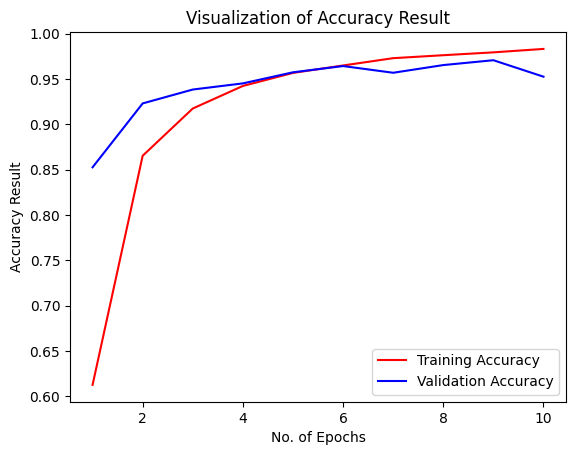

In [43]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [44]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [45]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid', #not test directory
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False, #not true coz it will be passed sequentially 
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [46]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 521s 30ms/step


(array([[9.99999762e-01, 2.34691072e-07, 3.19311439e-12, ...,
         2.67704432e-17, 2.38235979e-15, 3.23502847e-15],
        [9.99999762e-01, 2.06792038e-07, 2.36440988e-12, ...,
         1.38692712e-16, 3.18356385e-14, 4.53157951e-14],
        [1.00000000e+00, 1.19024290e-09, 1.27916408e-14, ...,
         1.14301859e-19, 4.85212699e-17, 1.36849647e-16],
        ...,
        [7.57148833e-09, 4.39102639e-13, 5.03816711e-10, ...,
         1.47297632e-10, 2.62246058e-10, 9.99999166e-01],
        [2.69355804e-09, 1.51434204e-13, 3.35975164e-10, ...,
         2.37843412e-10, 9.09668937e-11, 9.99999881e-01],
        [3.99693619e-16, 8.81078990e-20, 3.40523762e-16, ...,
         1.01956678e-17, 1.06512765e-16, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [49]:
predicted_categories = tf.argmax(y_pred, axis=1) #argamx() extract maximum value from above prob arr and return its index
#axis=1 means scan vertically

In [50]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [51]:
true_categories = tf.concat([y for x, y in test_set], axis=0)

In [52]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [53]:
Y_true = tf.argmax(true_categories, axis=1)

In [54]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [56]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix,classification_report

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.6 MB 11.6 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/10.6 MB 18.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.5/10.6 MB 27.8 MB/s eta 0:00:01
   --------------------- ------------------ 5.6/10.6 MB 32.7 MB/s eta 0:00:01
   ----------------------------- ---------- 7.9/10.6 MB 36.1 MB/s eta 0:00:01
   -------------------------------- ------- 8.6/10.6 MB 34.5 MB/s eta 0:00:01
   ---------------------------------- ----- 9.1/10.6 MB 29.0 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.6 MB 26.1 MB/s eta 0:00:01
   ----------------------------------- ---- 9.5/10.6 MB 23.3 MB/s eta 0:00:01
   ------------------------------------- -- 9.9/10.6 MB 21.2 MB/s eta 0:00:0

In [57]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.89      0.97      0.93       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.97      0.90      0.93       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.89      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

In [60]:
cm = confusion_matrix(Y_true,predicted_categories)
#cm.shape
cm

array([[489,   5,   0, ...,   0,   0,   0],
       [  1, 489,   0, ...,   0,   0,   0],
       [  0,   0, 432, ...,   0,   0,   2],
       ...,
       [  0,   0,   2, ..., 483,   0,   0],
       [  0,   0,   0, ...,   0, 428,   3],
       [  0,   0,   0, ...,   0,   0, 481]], dtype=int64)

### Confusion Matrix Visualization

In [62]:
#sns.heatmap(cm)

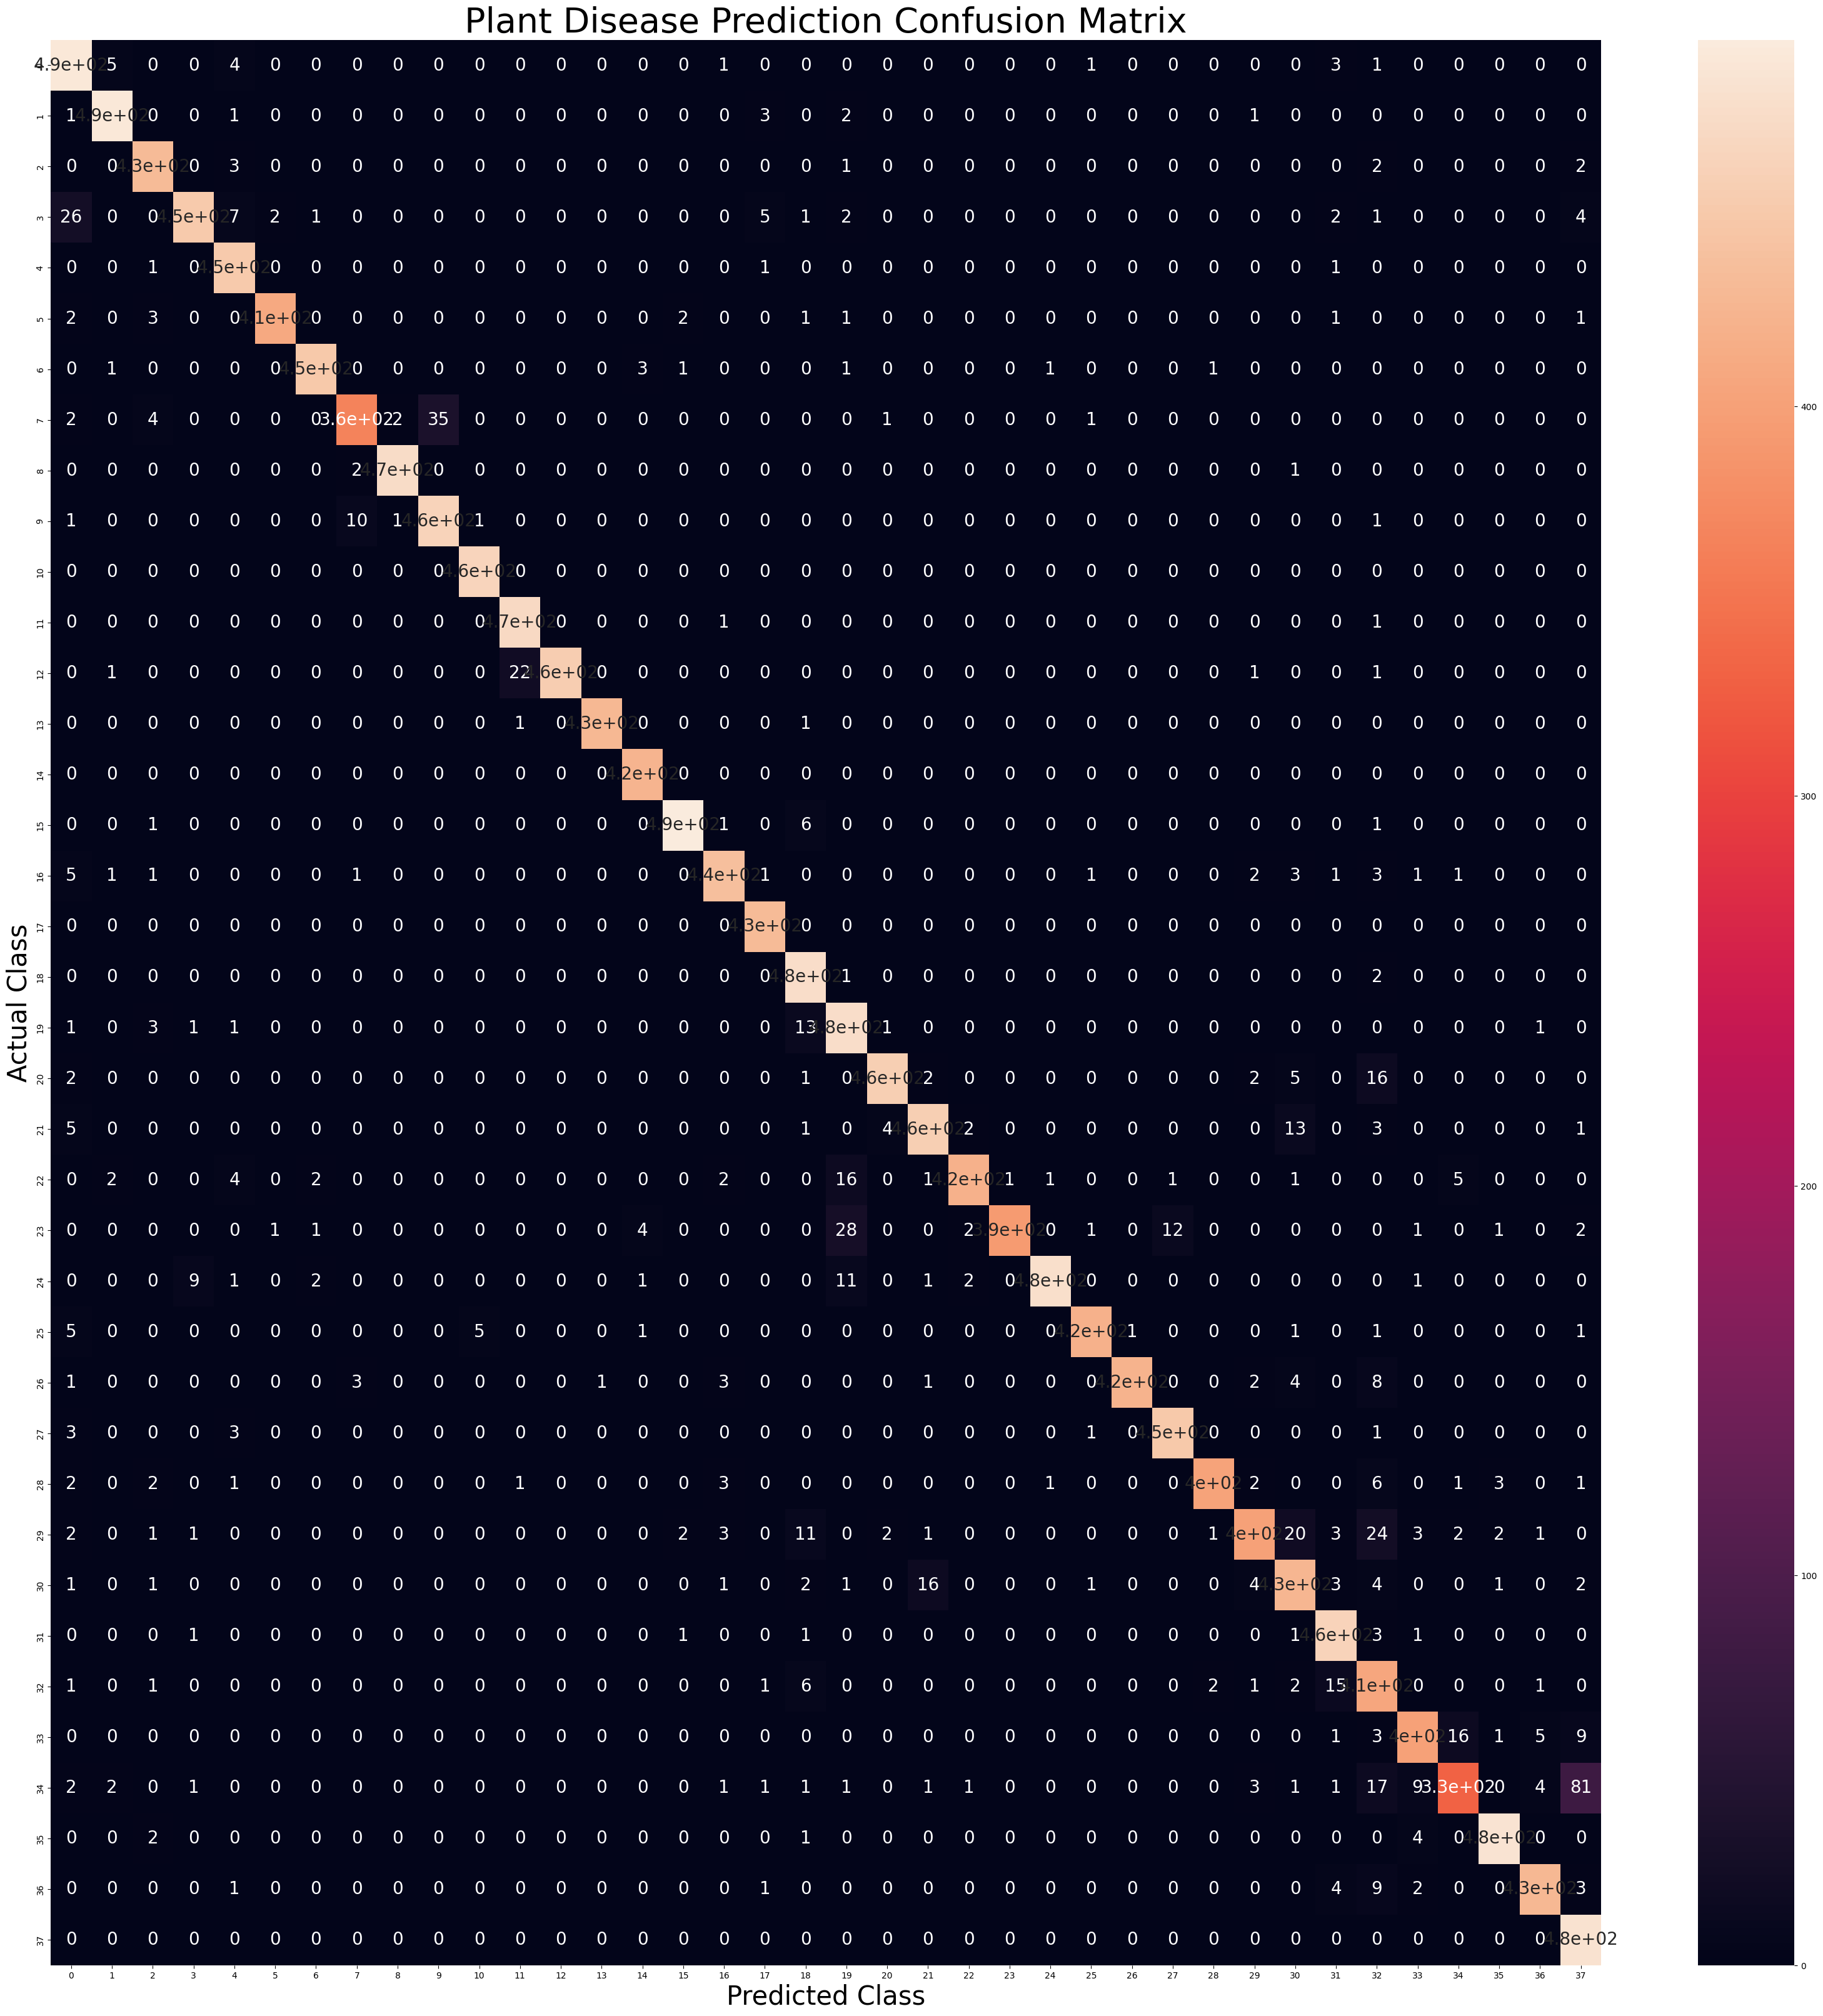

In [66]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 20})

plt.xlabel('Predicted Class',fontsize = 30)
plt.ylabel('Actual Class',fontsize = 30)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 40)
plt.show()